---
title: "Assignment - first graphs"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

This assignment relates to the content learned in the [introductory exercise lecture](/introduction/introduction-exercises.ipynb).

Go back to the weather station website, download one year of data from 01.01.2020 to 31.12.2020 (24h data). If you can't download the data, just click <a href="1year.csv" download>here</a>.

## graph 1
 
Make one graph with the following:

- daily tmax and tmin
- smoothed data for tmax and tmin

In order to smooth the data with a 30 day window, use the following function:  
`df['tmin'].rolling(30, center=True).mean()`  
This means that you will take the mean of 30 days, and put the result in the center of this 30-day window.

Play with this function, see what you can do with it. What happens when you change the size of the window? Why is the smoothed data shorter than the original data? See the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) for `rolling` to find more options.

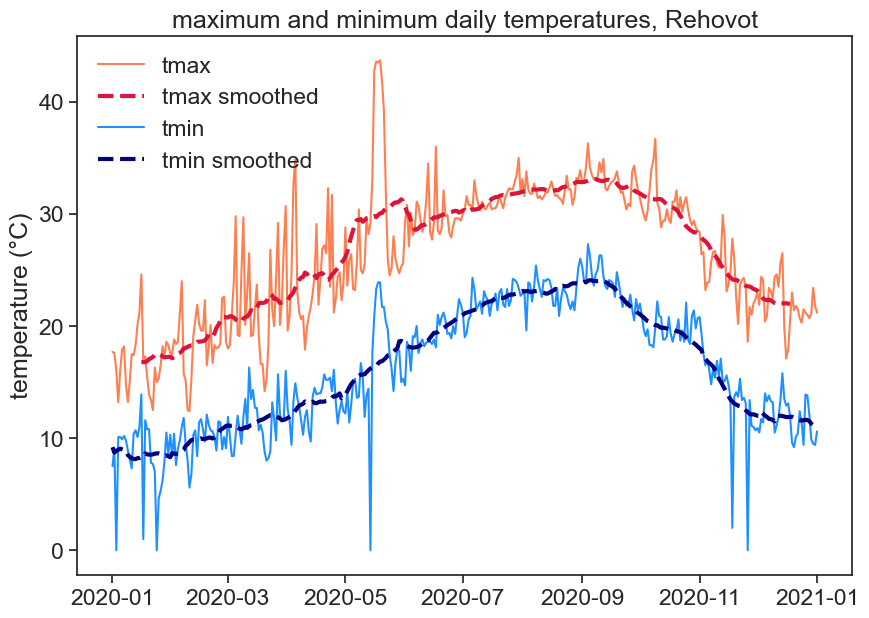

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)

fig, ax = plt.subplots(figsize=(10,7))
col_names = ['date', 'tmax', 'tmin', 'wind', 'rain24h', 'rain_cumulative']
df2 = pd.read_csv("1year.csv",
                  skiprows=5,
                  encoding='latin1',
                  names=col_names,
                  parse_dates=['date'],
                  dayfirst=True,
                  index_col='date'
                 )
tmin_smooth = df2['tmin'].rolling('30D', center=True).mean()
tmax_smooth = df2['tmax'].rolling(30, center=True).mean()
ax.plot(df2['tmax'], label='tmax', color="coral")
ax.plot(tmax_smooth, label='tmax smoothed', color="crimson", linestyle="--", linewidth=3)
ax.plot(df2['tmin'], label='tmin', color="dodgerblue")
ax.plot(tmin_smooth, label='tmin smoothed', color="navy", linestyle="--", linewidth=3)
ax.legend(frameon=False)
ax.set(ylabel='temperature (°C)',
       title='maximum and minimum daily temperatures, Rehovot'
      )
plt.savefig("t_smoothed.png")

## graph 2

Make another graph that focuses on a part of the year, not the whole thing. We saw before how to do that. Put on this graph two lines, representing two variables of your choosing. Give these lines good colors, and maybe different linestyles (solid, dashed, dotted) if you feel fancy. If the two variable you choose have different units, or if they have very different values (e.g. one is between 0 and 1, the other between 100 and 200), then you might find useful the following code. Here we learn how to make another yaxis.


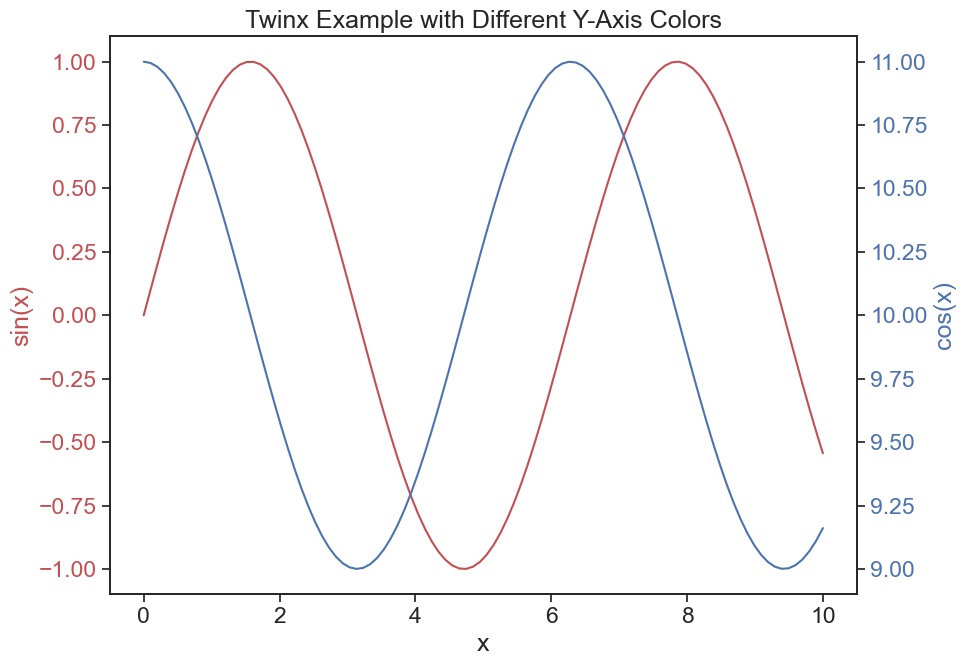

In [2]:
# generate some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x) + 10

fig, ax1 = plt.subplots(figsize=(10,7))

# create the first plot
ax1.plot(x, y1, 'r-', label='sin(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# instantiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# create the second plot
ax2.plot(x, y2, 'b-', label='cos(x)')
ax2.set_ylabel('cos(x)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# show the plot
plt.title('Twinx Example with Different Y-Axis Colors')
fig.tight_layout()  # to ensure the labels don't overlap


## graph 3

Choose another variable, and make two histograms (each in its own panel), each representing a different time interval. Here is an example how you make subplots:

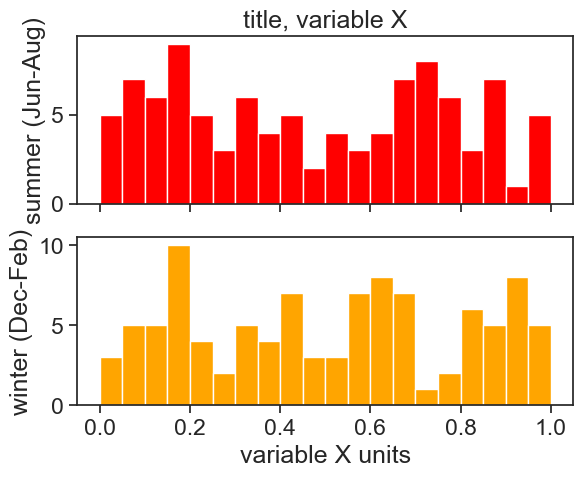

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
N = 100

bins = np.arange(0,1.05, 0.05)

ax1.hist(np.random.random(N), bins=bins, color="red")
ax2.hist(np.random.random(N), bins=bins, color="orange")
ax1.set(ylabel='summer (Jun-Aug)',
        title='title, variable X'
       )
ax2.set(ylabel='winter (Dec-Feb)',
        xlabel='variable X units',
       );